# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from auxPlots import readContours,label_line
import seaborn as sns
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

#### Get contours from different sources

In [3]:
    
# mtt (CMS-TOP-20-001)
cmsMTTdict = readContours('./CMS_mtt_oneLoop_contours.csv')
print('cmsMTT=',cmsMTTdict.keys())
cmsMTTdictExp = readContours('./CMS_mtt_oneLoop_contours_exp.csv')
print('cmsMTTexp=',cmsMTTdictExp.keys())

# pTt (ATLAS-TOPQ-2019-23)
atlasPTdict = readContours('./ATLAS_pT_oneLoop_contours.csv')
print('atlasPT=',atlasPTdict.keys())
atlasPTdictExp = readContours('./ATLAS_pT_oneLoop_contours_exp.csv')
print('atlasPTexp=',atlasPTdictExp.keys())


# Direct Searches
directDict = readContours('./DirectSearches_contours.csv')
print('Direct Searches=',directDict.keys())


cmsMTT= dict_keys([5.0, 10.0, 12.0, 15.0, 20.0])
cmsMTTexp= dict_keys([10.0, 12.0, 15.0, 20.0])
atlasPT= dict_keys([5.0, 10.0])
atlasPTexp= dict_keys([5.0, 10.0])
Direct Searches= dict_keys([0.66, 1.0])


## Version 2

In [16]:
# Select contour values:
colors = sns.color_palette('Paired')
plots = {
         'Direct Searches' : {'contour' : 0.66, 'dataDict' : directDict, 'label' : 'Direct Searches', 'textLabel' : None,                              
                              'fill' : True, 'linestyle' : 'solid', 'color' : sns.color_palette('deep')[1]},      
         r'$m(t\bar{t})$, $y_{DM} = 10$ (Obs)' : {'contour' : 10.0, 'dataDict' : cmsMTTdict, 
                                                     'label' : r'CMS - $m(\bar{t} t)$', 'textLabel' : r'$y_{DM} = 10$ (Obs)','textoffset' : 20,
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[1]},
         r'$m(t\bar{t})$, $y_{DM} = 10$ (Exp)' : {'contour' : 10.0, 'dataDict' : cmsMTTdictExp, 
                                                  'label' : None,'textLabel' : r'$y_{DM} = 10$ (Exp)','textoffset' : 20,
                                                  'fill' : False, 'linestyle' : 'dotted', 'color' : colors[1]},
         r'$p_T(t_h)$, $y_{DM} = 10$ (Obs)' : {'contour' : 10.0, 'dataDict' : atlasPTdict, 
                                                     'label' : r'ATLAS - $p_T(t)$',  'textLabel' : r'$y_{DM} = 10$ (Obs)','textoffset' : 20,
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[5]},
        r'$p_T(t_h)$, $y_{DM} = 10$ (Exp)' : {'contour' : 10.0, 'dataDict' : atlasPTdictExp, 
                                                  'label' : None, 'textLabel' : r'$y_{DM} = 10$ (Exp)','textoffset' : 20,
                                                  'fill' : False, 'linestyle' : 'dotted', 'color' : colors[5]},

         }

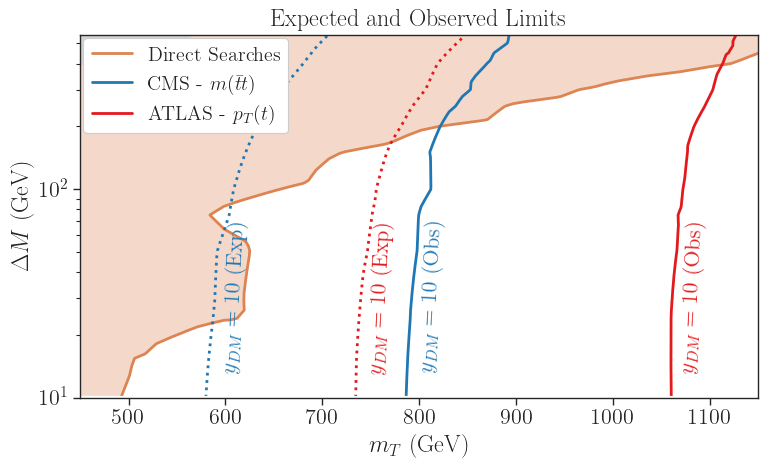

In [25]:
fig = plt.figure(figsize=(8,5))

for p,pInfo in plots.items():
    data = pInfo['dataDict'][pInfo['contour']]
    x = data['mST_GeV']
    y = data['deltaM_GeV']
    # if any(x > 450.):
        # y = y[x>450.]
        # x = x[x>450.]
    label = pInfo['label']
    txtLabel = pInfo['textLabel']
    l, = plt.plot(x,y,label=label,linewidth=2,color=pInfo['color'],linestyle=pInfo['linestyle'])
    if txtLabel:
        label_line(fig,l, txtLabel, near_y=30.,
                rotation=87.,fontsize=16,
                xmin=450.,offset=(pInfo['textoffset'],0.),boxalpha=0.0)
    
    if pInfo['fill']:
        plt.fill_betweenx(y,x,200,alpha=0.3,color=pInfo['color'])
        

plt.fill_betweenx([200.,600.],[200.,600.],color='lightgray',alpha=1.0)
# plt.text(210.,400.,r'$m_T < m_{\chi}$',fontsize=17)
plt.hlines(y=10.,xmin=0.,xmax=2000.,colors='white',linewidth=3)

plt.legend(loc=(0.005,0.73),fontsize=14.5,framealpha=1.0)
plt.yscale('log')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(450,1150)
plt.ylim(10,550)
plt.title('Expected and Observed Limits')
plt.tight_layout()
plt.savefig('allExclusions_exp.png')
plt.show()